# Temperature simulation

In [256]:
import numpy as np
import matplotlib.pyplot as plt

## Constants

In [257]:
DAYS = 7
SEASON = "fall"
SEASON_VALUES = {
    "fall": (5, 10),
    "winter": (5, 5),
    "summer": (5, 20),
    "spring": (5, 15),
}

## Functions

In [258]:
def generate_points(days, season, dist="normal"):
    hours = days * 24
    amplitude, constant = SEASON_VALUES[season]
    X = np.arange(hours) * np.pi / 12 - 5
    trend = -amplitude * np.sin(X) + constant
    
    noise = {
        "normal": np.random.normal,
        "poisson": np.random.poisson,
        "log":np.random.lognormal,
        "exp": np.random.exponential,
    }[dist](size=hours)

    signal = noise + trend

    return signal

In [259]:
def plot(signal, season, dist="Normal"):
    fig, axes = plt.subplots(nrows=2, figsize=(14, 7))

    axes[0].plot(signal)
    axes[0].set_xlabel("Hours")
    axes[0].set_ylabel("Temperature")

    title = f"Season: {season}, Distribution: {dist}"
    axes[0].set_title(title)

    axes[1].hist(signal)
    axes[1].set_xlabel("Temperature")
    axes[1].set_ylabel("Count")
    

## Simulation for each distribution

In [260]:
signal_norm = generate_points(DAYS, SEASON)
signal_poisson = generate_points(DAYS, SEASON, "poisson")
signal_log = generate_points(DAYS, SEASON, "log")
signal_exp = generate_points(DAYS, SEASON, "exp")

### Normal

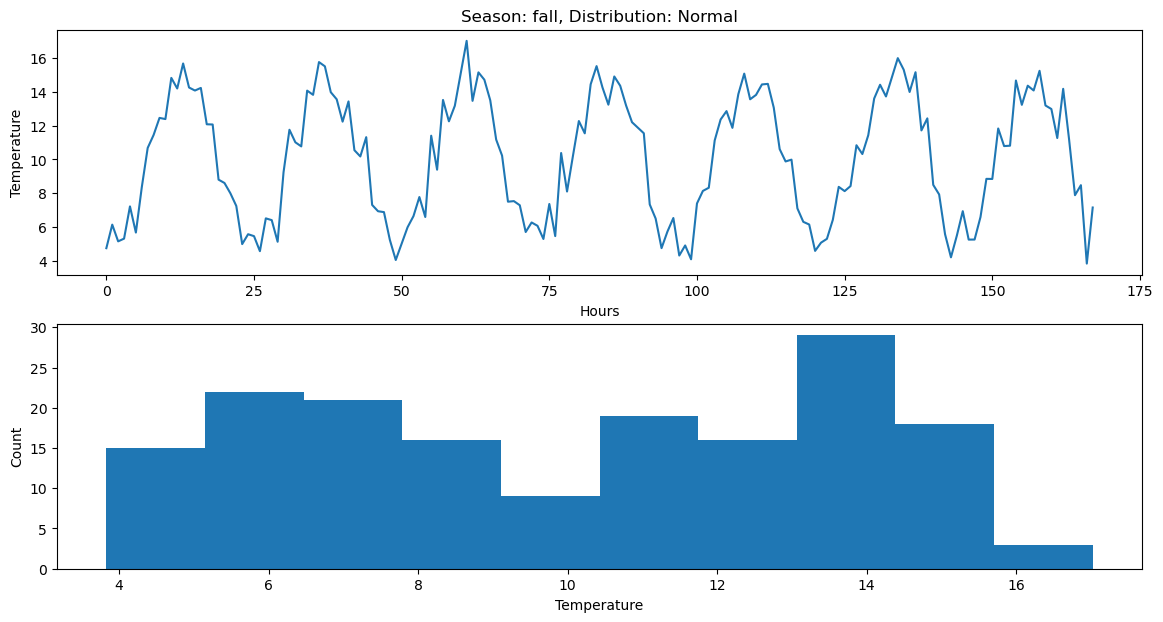

In [261]:
plot(signal_norm, SEASON, "Normal")

### Poisson

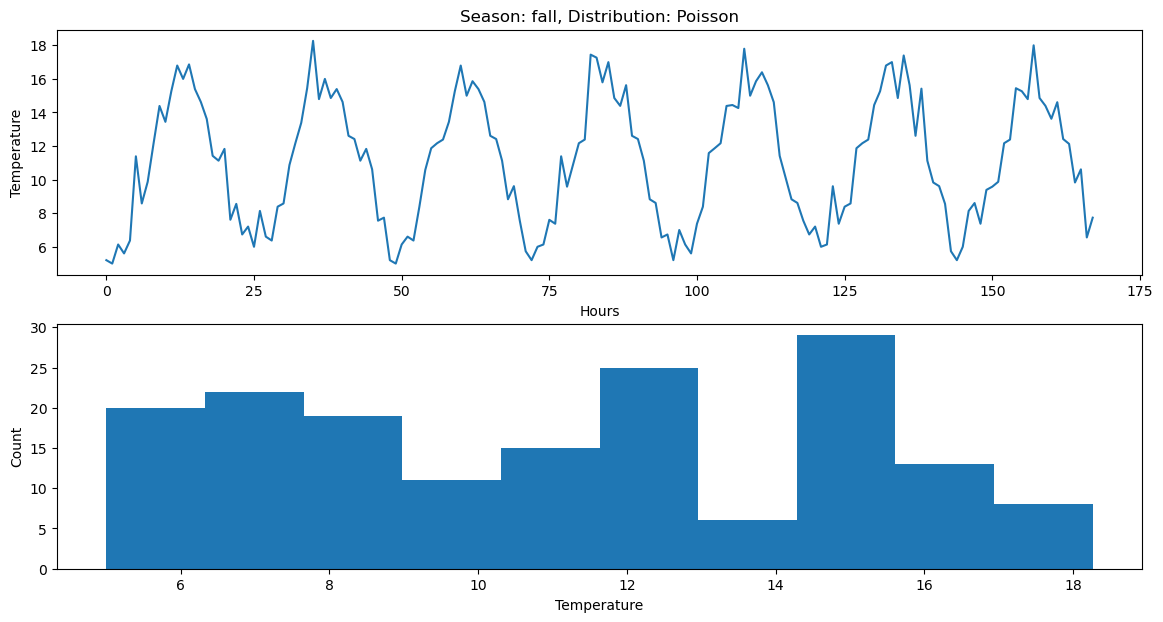

In [262]:
plot(signal_poisson, SEASON, "Poisson")

### Log

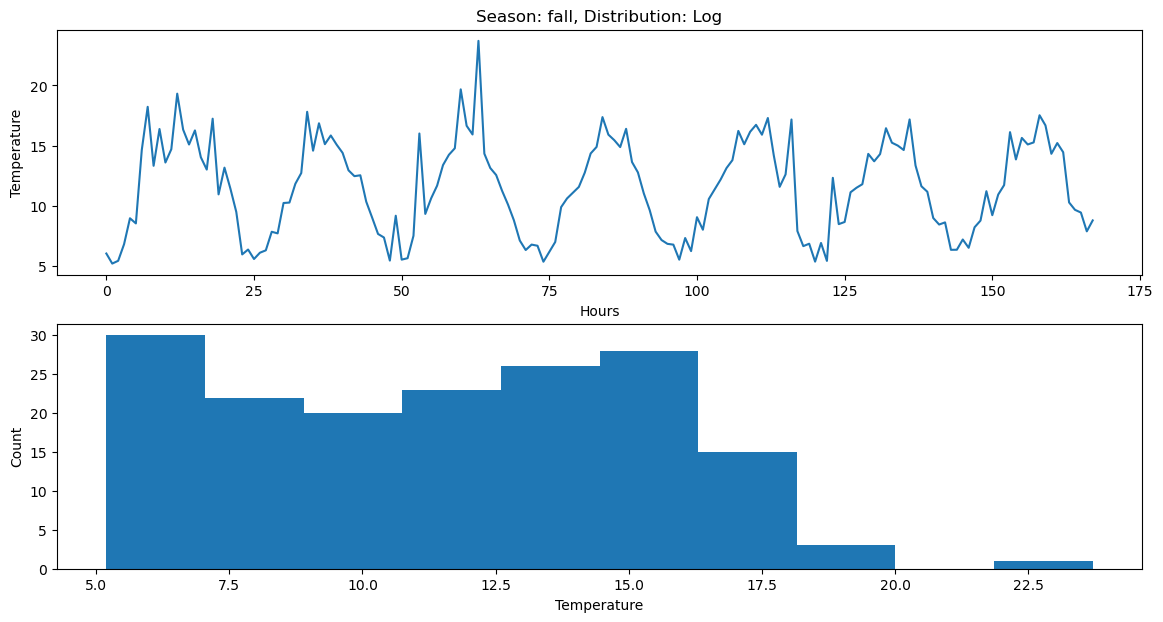

In [263]:
plot(signal_log, SEASON, "Log")

### Exp

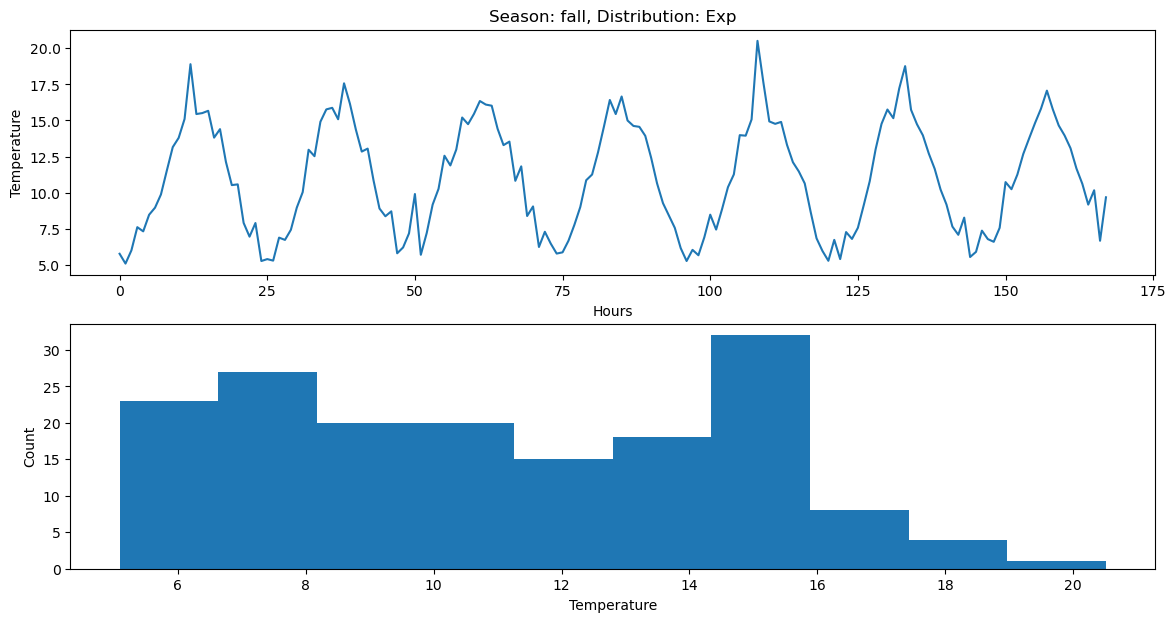

In [264]:
plot(signal_exp, SEASON, "Exp")

## Simulation for each season

In [265]:
signal_winter = generate_points(DAYS, "winter")
signal_fall = generate_points(DAYS, "fall")
signal_summer = generate_points(DAYS, "summer")
signal_spring = generate_points(DAYS, "spring")

### Winter

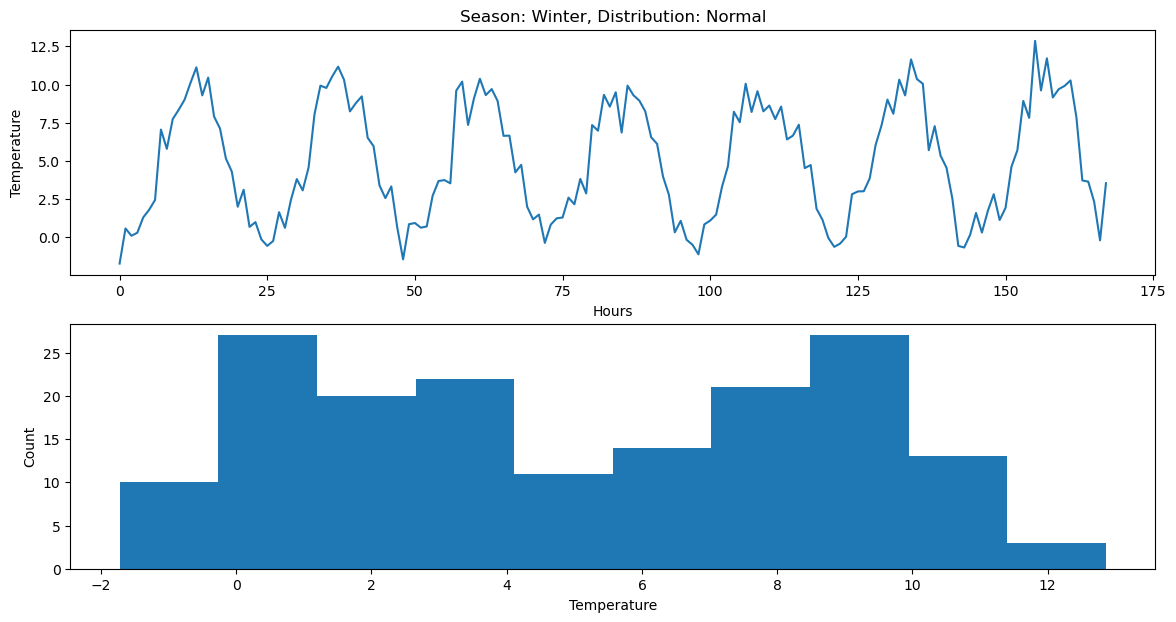

In [266]:
plot(signal_winter, "Winter")

### Spring

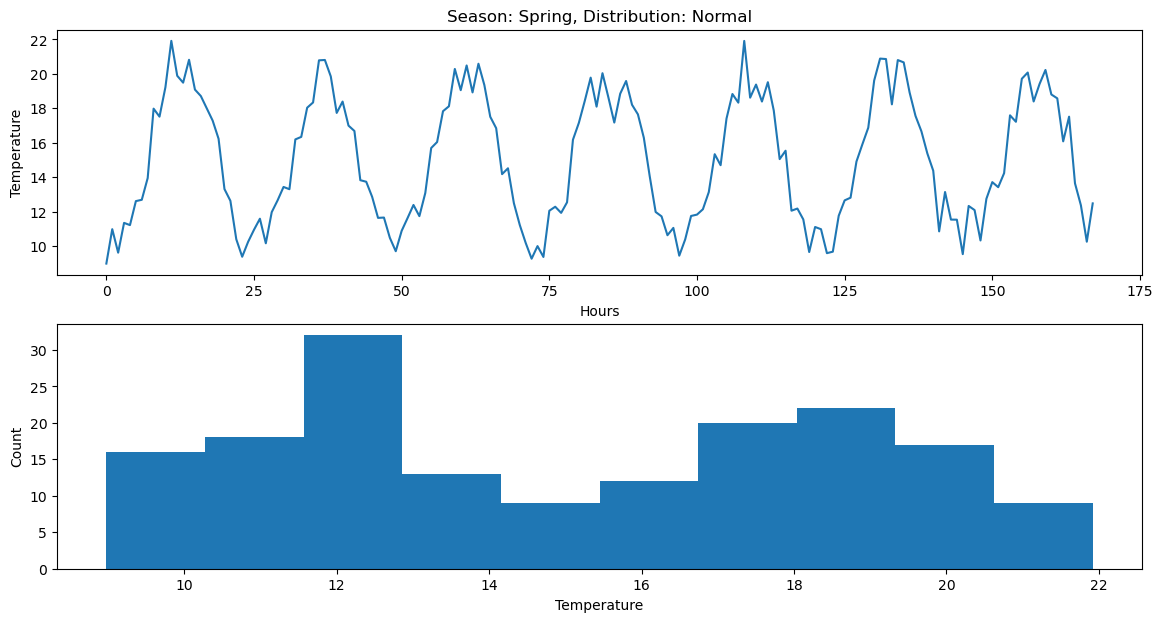

In [267]:
plot(signal_spring, "Spring")

### Summer

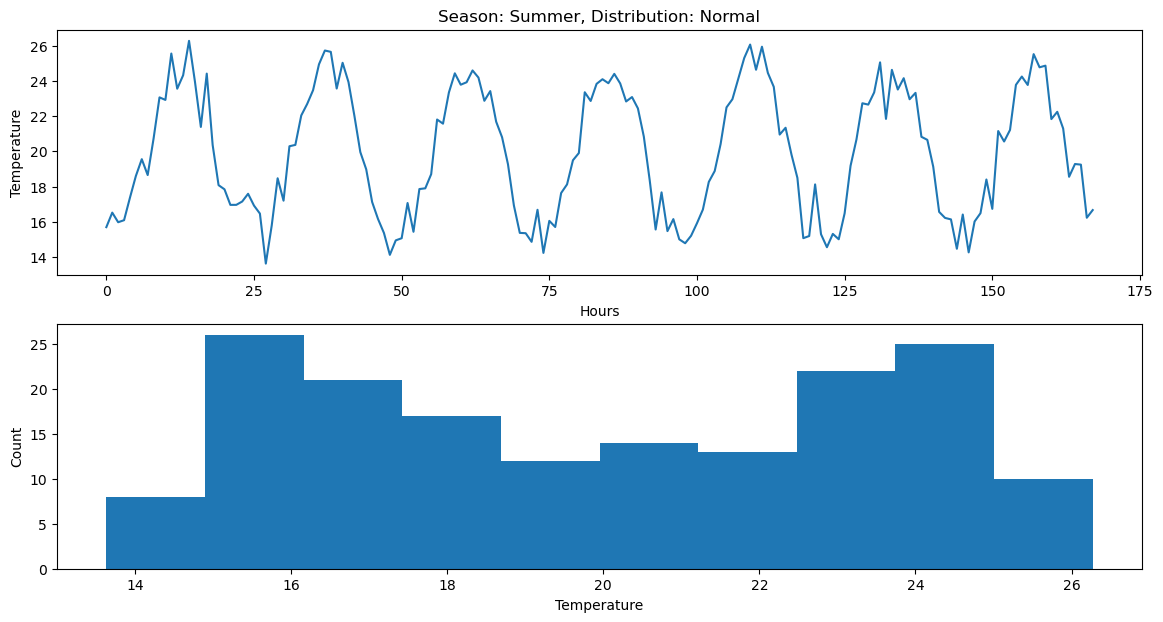

In [268]:
plot(signal_summer, "Summer")

### Fall

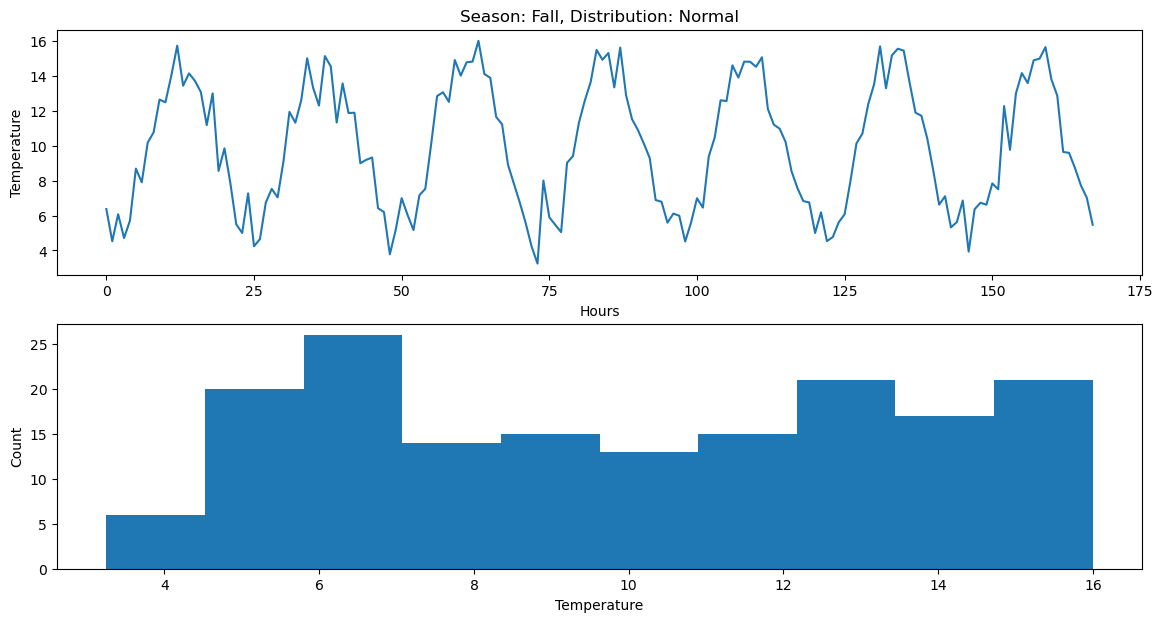

In [269]:
plot(signal_fall, "Fall")